<a href="https://colab.research.google.com/github/Shashwat-Akhilesh-Shukla/MidnightReads/blob/main/AIML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv')

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       

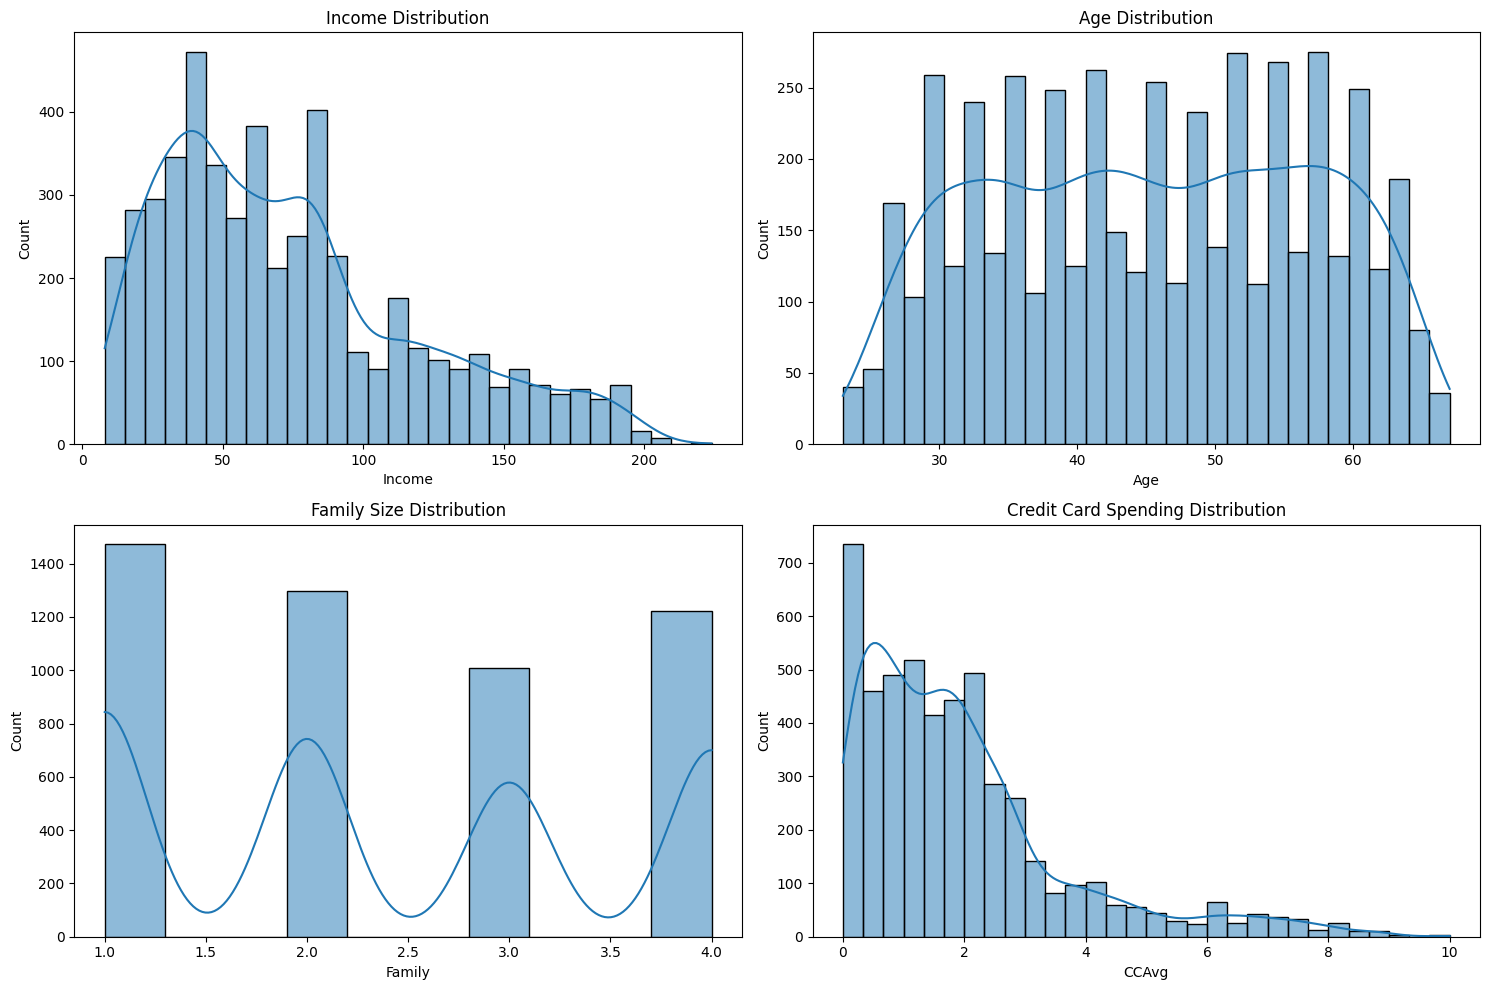

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Income'], kde=True, bins=30)
plt.title('Income Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['Family'], kde=True, bins=10)
plt.title('Family Size Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['CCAvg'], kde=True, bins=30)
plt.title('Credit Card Spending Distribution')

plt.tight_layout()
plt.show()

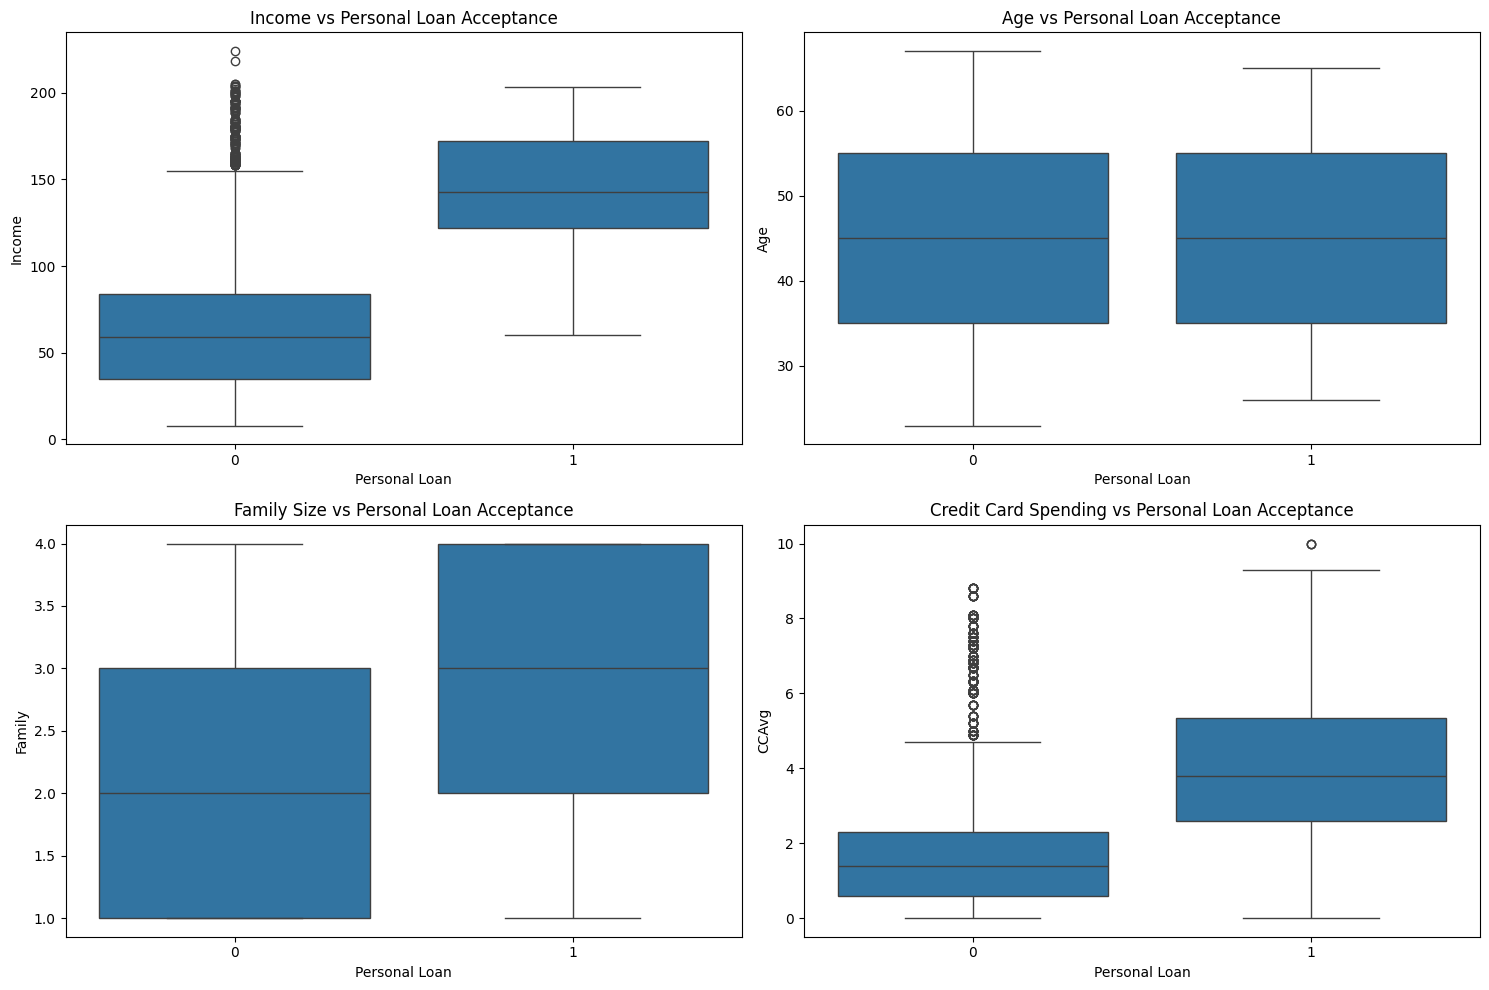

In [ ]:
# Relationship with Personal_Loan
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Personal Loan', y='Income', data=data)
plt.title('Income vs Personal Loan Acceptance')

plt.subplot(2, 2, 2)
sns.boxplot(x='Personal Loan', y='Age', data=data)
plt.title('Age vs Personal Loan Acceptance')

plt.subplot(2, 2, 3)
sns.boxplot(x='Personal Loan', y='Family', data=data)
plt.title('Family Size vs Personal Loan Acceptance')

plt.subplot(2, 2, 4)
sns.boxplot(x='Personal Loan', y='CCAvg', data=data)
plt.title('Credit Card Spending vs Personal Loan Acceptance')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.64      0.73       157

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Display the coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)


                    Coefficient
Age                   -0.032796
Experience             0.045584
Income                 0.051457
Family                 0.671177
CCAvg                  0.107473
Education              1.573196
Mortgage               0.000651
Securities Account    -0.743294
CD Account             3.005660
Online                -0.474348
CreditCard            -0.881423


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Build and train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_tree_pred)}")
print(confusion_matrix(y_test, y_tree_pred))
print(classification_report(y_test, y_tree_pred))


Accuracy: 0.98
[[1331   12]
 [  18  139]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
# Feature importances from the decision tree
importances = tree_model.feature_importances_
feature_importances = pd.DataFrame(importances, X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                    Importance
Education             0.375005
Income                0.305327
Family                0.162864
CCAvg                 0.078191
Experience            0.019762
Mortgage              0.014892
Online                0.014456
CD Account            0.014207
Age                   0.012739
CreditCard            0.002558
Securities Account    0.000000
